# Q-Learning Implementation

* Importing necessary libraries:

In [50]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import moviepy

* Defining the Q-Learning Class:

In [85]:
class QLearningAgent:
    def __init__(self, env, learning_rate, discount_factor, exploration_rate, max_exploration_rate,
                 min_exploration_rate, exploration_decay_rate):
        """
        Initialize the Q-Learning agent.

        Args:
            env: The Gym environment.
            learning_rate: The learning rate (alpha) for Q-value updates.
            discount_factor: The discount factor (gamma) for future rewards.
            exploration_rate: The initial exploration rate (epsilon) for epsilon-greedy policy.
            max_exploration_rate: The maximum exploration rate.
            min_exploration_rate: The minimum exploration rate.
            exploration_decay_rate: The decay rate for exploration rate.

        """
        self.env = env
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_rate = exploration_rate
        self.max_exploration_rate = max_exploration_rate
        self.min_exploration_rate = min_exploration_rate
        self.exploration_decay_rate = exploration_decay_rate

        self.num_states = env.observation_space.n
        self.num_actions = env.action_space.n
        self.q_table = np.zeros((self.num_states, self.num_actions))

    def update_q_table(self, state, action, reward, next_state):
        """
        Update the Q-table based on the observed transition.

        Args:
            state: The current state.
            action: The taken action.
            reward: The observed reward.
            next_state: The next state.
            terminated: Whether the episode is terminated.

        """
        state = int(state)
        next_state = int(next_state)
        action = int(action)
        max_q_value = np.max(self.q_table[next_state])
        self.q_table[state, action] = (self.q_table[state, action] + self.learning_rate * 
                                       (reward + self.discount_factor * max_q_value - self.q_table[state, action]))

    def train(self, num_episodes, max_steps_per_episode):
        """
        Train the Q-Learning agent.

        Args:
            num_episodes: The number of episodes to train.
            max_steps_per_episode: The maximum number of steps per episode.

        Returns:
            rewards: List of episode rewards.
            exploration_rates: List of exploration rates.

        """
        rewards = []
        exploration_rates = []
        
        # Create a RecordVideo wrapper to record the training as a video
        self. env = gym.wrappers.RecordVideo(self.env, "video", episode_trigger=lambda x: x % 100 == 0)

        for episode in range(num_episodes):
            state, _ = self.env.reset()
            episode_reward = 0
            terminated = False

            for step in range(max_steps_per_episode):
                # Exploration-exploitation trade-off
                exploration_threshold = np.random.uniform(0, 1)
                if exploration_threshold > self.exploration_rate:
                    action = np.argmax(self.q_table[state])
                else:
                    action = self.env.action_space.sample()

                next_state, reward, terminated, truncated, _ = self.env.step(action)

                self.update_q_table(state, action, reward, next_state)

                state = next_state
                episode_reward += reward

                if terminated or truncated:
                    break

            # Decay exploration rate
            self.exploration_rate = (self.min_exploration_rate + (self.max_exploration_rate - self.min_exploration_rate)
                                     * np.exp(-self.exploration_decay_rate * episode))

            rewards.append(episode_reward)
            exploration_rates.append(self.exploration_rate)
        
        self.env.close()

        return rewards, exploration_rates

* Creating the Environment:

In [86]:
env = gym.make('Taxi-v3',render_mode='rgb_array')

* Defining the Hyperparameters:

In [87]:
num_episodes = 1000
max_steps_per_episode = 100
learning_rate = 0.7
discount_factor = 0.6
exploration_rate = 1.0
max_exploration_rate = 1.0
min_exploration_rate = 0.01
exploration_decay_rate = 0.01

* Training the Agent:

In [88]:
# Create Q-Learning agent
agent = QLearningAgent(env, learning_rate, discount_factor, exploration_rate, max_exploration_rate, min_exploration_rate, exploration_decay_rate)

# Train the agent
rewards, exploration_rates = agent.train(num_episodes, max_steps_per_episode)

Moviepy - Building video c:\Users\FURKANSALMAN\PycharmProjects\EARIN_23L\lab6\video\rl-video-episode-0.mp4.
Moviepy - Writing video c:\Users\FURKANSALMAN\PycharmProjects\EARIN_23L\lab6\video\rl-video-episode-0.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\FURKANSALMAN\PycharmProjects\EARIN_23L\lab6\video\rl-video-episode-0.mp4
Moviepy - Building video c:\Users\FURKANSALMAN\PycharmProjects\EARIN_23L\lab6\video\rl-video-episode-100.mp4.
Moviepy - Writing video c:\Users\FURKANSALMAN\PycharmProjects\EARIN_23L\lab6\video\rl-video-episode-100.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\FURKANSALMAN\PycharmProjects\EARIN_23L\lab6\video\rl-video-episode-100.mp4
Moviepy - Building video c:\Users\FURKANSALMAN\PycharmProjects\EARIN_23L\lab6\video\rl-video-episode-200.mp4.
Moviepy - Writing video c:\Users\FURKANSALMAN\PycharmProjects\EARIN_23L\lab6\video\rl-video-episode-200.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\FURKANSALMAN\PycharmProjects\EARIN_23L\lab6\video\rl-video-episode-200.mp4
Moviepy - Building video c:\Users\FURKANSALMAN\PycharmProjects\EARIN_23L\lab6\video\rl-video-episode-300.mp4.
Moviepy - Writing video c:\Users\FURKANSALMAN\PycharmProjects\EARIN_23L\lab6\video\rl-video-episode-300.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\FURKANSALMAN\PycharmProjects\EARIN_23L\lab6\video\rl-video-episode-300.mp4


Moviepy - Building video c:\Users\FURKANSALMAN\PycharmProjects\EARIN_23L\lab6\video\rl-video-episode-400.mp4.
Moviepy - Writing video c:\Users\FURKANSALMAN\PycharmProjects\EARIN_23L\lab6\video\rl-video-episode-400.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\FURKANSALMAN\PycharmProjects\EARIN_23L\lab6\video\rl-video-episode-400.mp4


Moviepy - Building video c:\Users\FURKANSALMAN\PycharmProjects\EARIN_23L\lab6\video\rl-video-episode-500.mp4.
Moviepy - Writing video c:\Users\FURKANSALMAN\PycharmProjects\EARIN_23L\lab6\video\rl-video-episode-500.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\FURKANSALMAN\PycharmProjects\EARIN_23L\lab6\video\rl-video-episode-500.mp4


Moviepy - Building video c:\Users\FURKANSALMAN\PycharmProjects\EARIN_23L\lab6\video\rl-video-episode-600.mp4.
Moviepy - Writing video c:\Users\FURKANSALMAN\PycharmProjects\EARIN_23L\lab6\video\rl-video-episode-600.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\FURKANSALMAN\PycharmProjects\EARIN_23L\lab6\video\rl-video-episode-600.mp4
Moviepy - Building video c:\Users\FURKANSALMAN\PycharmProjects\EARIN_23L\lab6\video\rl-video-episode-700.mp4.
Moviepy - Writing video c:\Users\FURKANSALMAN\PycharmProjects\EARIN_23L\lab6\video\rl-video-episode-700.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\FURKANSALMAN\PycharmProjects\EARIN_23L\lab6\video\rl-video-episode-700.mp4


Moviepy - Building video c:\Users\FURKANSALMAN\PycharmProjects\EARIN_23L\lab6\video\rl-video-episode-800.mp4.
Moviepy - Writing video c:\Users\FURKANSALMAN\PycharmProjects\EARIN_23L\lab6\video\rl-video-episode-800.mp4



Moviepy - Done !
Moviepy - video ready c:\Users\FURKANSALMAN\PycharmProjects\EARIN_23L\lab6\video\rl-video-episode-800.mp4


* Plotting the Rewards and Exploration Rate:

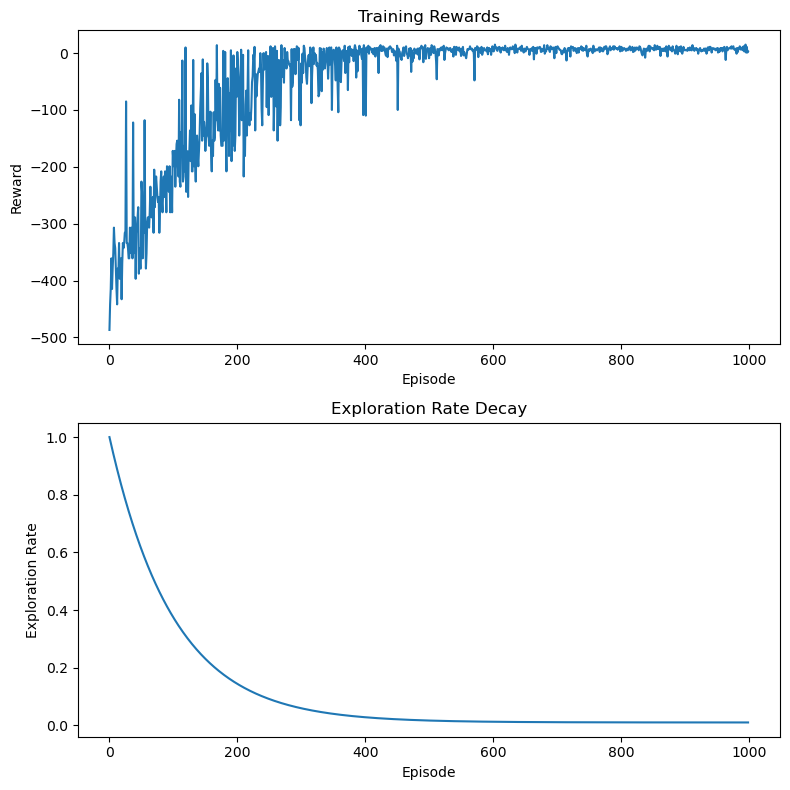

In [89]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))
axes[0].plot(rewards)
axes[0].set_xlabel('Episode')
axes[0].set_ylabel('Reward')
axes[0].set_title('Training Rewards')

axes[1].plot(exploration_rates)
axes[1].set_xlabel('Episode')
axes[1].set_ylabel('Exploration Rate')
axes[1].set_title('Exploration Rate Decay')

plt.tight_layout()
plt.show()

## Experiments (Will be added)